In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from models import CNN_Text
#import json
import random
from data_process import EmbeddingManager


#import os

from evaluation_tool import EvaluationManager


In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from evaluation_tool import EvaluationManager


used_embedding = 'sgns.zhihu.word'
embedding_dir = 'embedding_tensor'
load_cache_model = "model_cache/model"

embedding_manager = EmbeddingManager(used_embedding, embedding_dir)
    
class args():
    embed_num = embedding_manager.spec['num_word']
    embed_dim = embedding_manager.spec['dim_word']
    class_num = 2
    kernel_num = 100 # default value in https://github.com/Shawn1993/cnn-text-classification-pytorch/blob/master/main.py
    kernel_sizes = [3,4,5]
    dropout = 0.5
    lr = 0.001
    
model = CNN_Text(args)
model.load_state_dict(torch.load(load_cache_model))
print(f'load {load_cache_model}')

feature_list, target_list = embedding_manager.load_data('traning_data.json')
feature_list_test, target_list_test = embedding_manager.load_data('testing_data.json')

cuda = True
if cuda:

    feature_list = [feature.cuda() for feature in feature_list]
    target_list = [target.cuda() for target in target_list]
    feature_list_test = [feature.cuda() for feature in feature_list_test]
    target_list_test = [target.cuda() for target in target_list_test]

    model.cuda()

load model_cache/model
size 6280 -> 6143
size 320 -> 306


In [4]:
model.train(False)

evaluation_manager = EvaluationManager(model, embedding_manager, cuda = cuda)
get_acc = evaluation_manager.get_acc
confuse_matrix = evaluation_manager.confuse_matrix
analysis_doc = evaluation_manager.analysis_doc


print(f'train acc {get_acc(feature_list, target_list)}') # 0.94
print(confuse_matrix(feature_list, target_list))

print(f'test acc {get_acc(feature_list_test, target_list_test)}') #
print(confuse_matrix(feature_list_test, target_list_test))

    
good_list = analysis_doc('extracted_text/AI报告_杨帆_117106010714.docx.txt')
bad_list = analysis_doc('extracted_text/AI报告_张佳洛_117106021976.docx.txt')

train acc 0.9791632752726681
tensor([[4797,    4],
        [ 124, 1218]])
test acc 0.8071895424836601
tensor([[234,   8],
        [ 51,  13]])


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YIYUEZ~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.601 seconds.
Prefix dict has been built succesfully.


none count: 174 / 11644
none count: 175 / 7350


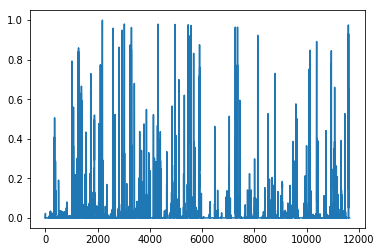

In [5]:
plt.plot(good_list)
plt.show()

In [6]:
np.mean(good_list)

0.028400427245275715

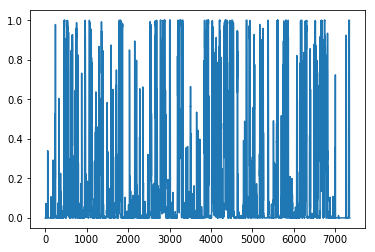

In [8]:
plt.plot(bad_list)
plt.show()

In [9]:
np.mean(bad_list)

0.17976519391334464

In [31]:
import json
with open('traning_data.json', encoding='utf8') as f:
    training_data = json.load(f)
with open('testing_data.json', encoding='utf8') as f:
    testing_data = json.load(f)

In [16]:
training_data.keys()

dict_keys(['word_list', 'label_list', 'count_list', 'name_list'])

In [25]:
import os
def refine_name_list(name_list, new_root = 'extracted_text'):
    new_name_list = []
    for name in name_list:
        stat_path = os.path.splitext(name)[0]
        name = os.path.split(stat_path)[1]
        path = os.path.join(new_root, name)
        new_name_list.append(path)
    return new_name_list

In [27]:
training_prob_list = []
for path in refine_name_list(training_data['name_list']):
    print(f'analysing {path}')
    training_prob_list.append(analysis_doc(path))
    


analysing extracted_text\AI 报告_吕超贤_117106010741.docx.txt
none count: 100 / 9783
analysing extracted_text\AI 报告_唐伟_117106010729.docx.txt
none count: 387 / 8307
analysing extracted_text\AI 报告_宋梦菲_117106010766.pdf.txt
none count: 1007 / 10899
analysing extracted_text\AI 报告_张亮_117106021947.docx.txt
none count: 800 / 7627
analysing extracted_text\AI 报告_蔡鸿杰_117106010756.docx.txt
none count: 234 / 7458
analysing extracted_text\AI 报告_许成豪_117106021893 (1).docx.txt
none count: 46 / 3481
analysing extracted_text\AI 报告_许成豪_117106021893.docx.txt
none count: 289 / 6414
analysing extracted_text\AI 报告_许杰_117106010696.docx.txt
none count: 45 / 5983
analysing extracted_text\AI 报告_谭镭_117106021961.docx.txt
none count: 92 / 6887
analysing extracted_text\AI 报告_赵玉英_117106010740.doc.txt
none count: 931 / 7647
analysing extracted_text\AI 报告_陆峰_117106021882.pdf.txt
none count: 639 / 10245
analysing extracted_text\AI 报告_韩慧_117106010759.pdf.txt
none count: 3230 / 15173
analysing extracted_text\AI+汤爽+117106032752.

none count: 165 / 14443
analysing extracted_text\AI报告_江涛_117106021952.docx.txt
none count: 137 / 7106
analysing extracted_text\AI报告_沈东风_117106010734.docx.txt
none count: 1554 / 9951
analysing extracted_text\AI报告_潘琳琳_117106021875.docx.txt
none count: 91 / 6875
analysing extracted_text\AI报告_牟升_117106021929.doc.txt
none count: 185 / 8869
analysing extracted_text\AI报告_牟甲鹏_117106021969.docx.txt
none count: 186 / 10329
analysing extracted_text\AI报告_王佳贺_117106010772.docx.txt
none count: 290 / 13128
analysing extracted_text\AI报告_王凡海_117106010690.docx.txt
none count: 73 / 6821
analysing extracted_text\AI报告_王希冀_117106010711.docx.txt
none count: 84 / 12383
analysing extracted_text\AI报告_王恰_117106021913.docx.txt
none count: 640 / 8390
analysing extracted_text\AI报告_王振鹏_117106010733.doc.txt
none count: 151 / 8525
analysing extracted_text\AI报告_王琨_117106021919.docx.txt
none count: 809 / 6187
analysing extracted_text\AI报告_王胤多_117106021933.docx.txt
none count: 249 / 14859
analysing extracted_text\AI报告_王轶

KeyError: 'name_list'

In [32]:
testing_prob_list = []

for path in refine_name_list(testing_data['name_list']):
    print(f'analysing {path}')
    testing_prob_list.append(analysis_doc(path))

analysing extracted_text\AI报告-吴胖-117106032748.doc.txt
none count: 85 / 6212
analysing extracted_text\AI报告-吴轶凡-117106021953.docx.txt
none count: 139 / 6512
analysing extracted_text\AI报告-姚文-117106021903.doc.txt
none count: 299 / 9276
analysing extracted_text\AI报告-张亚楠-117106021921 (1).docx.txt
none count: 128 / 7252
analysing extracted_text\AI报告-张亚楠-117106021921.docx.txt
none count: 126 / 7252
analysing extracted_text\AI报告-张文翔-117106032746.docx.txt
none count: 224 / 8272
analysing extracted_text\AI报告-梁潇-117106021932.docx.txt
none count: 376 / 6952
analysing extracted_text\AI报告-楚榕珍-117107010882.docx.txt
none count: 3996 / 22381


In [35]:
len(training_prob_list),len(training_prob_list[0])

(157, 9783)

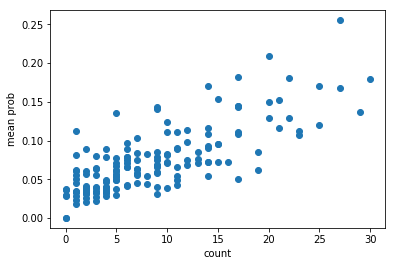

In [42]:
plt.plot(training_data['count_list'], [np.mean(prob) for prob in training_prob_list],'o')
plt.xlabel('count')
plt.ylabel('mean prob')
plt.show()

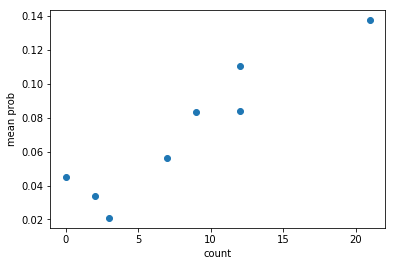

In [46]:
torch.save(dict(training_prob_list = training_prob_list, testing_prob_list = testing_prob_list), 'evaluate_cache')